# Previsão de preços de ações -- Random Forest

### Importar pacotes e o dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in c:\users\caiol\anaconda3\lib\site-packages (0.1.74)


In [31]:
import yfinance as yf
yf.pdr_override()

In [32]:
codigo = ['PETR4.SA']
petro = yf.Ticker(codigo[0])

In [33]:
petro = petro.history(start='2012-01-01', end='2022-07-01')

### Limpar os dados necessários

In [34]:
petro.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-24,26.76,27.090000,26.18,26.290001,53413400,0.0,0
2022-06-27,26.82,28.070000,26.66,27.980000,90417700,0.0,0
2022-06-28,28.58,28.830000,28.02,28.330000,51388000,0.0,0
2022-06-29,28.48,28.820000,27.84,28.080000,52048800,0.0,0
2022-06-30,27.65,28.059999,27.40,27.930000,49910100,0.0,0


In [35]:
print(petro['Stock Splits'].unique())
petro['Dividends'].unique()

[0]


array([0.000000e+00, 1.773000e-01, 1.244000e-01, 2.000000e-01,
       3.861700e-01, 9.672000e-01, 5.000000e-02, 1.000000e-01,
       7.165630e-01, 1.949400e-02, 2.009250e-01, 4.219420e-01,
       4.490000e-04, 4.610000e-04, 7.928340e-01, 1.609911e+00,
       3.250487e+00, 2.970249e+00, 3.715490e+00])

In [36]:
petro.drop('Stock Splits',axis=1, inplace=True)

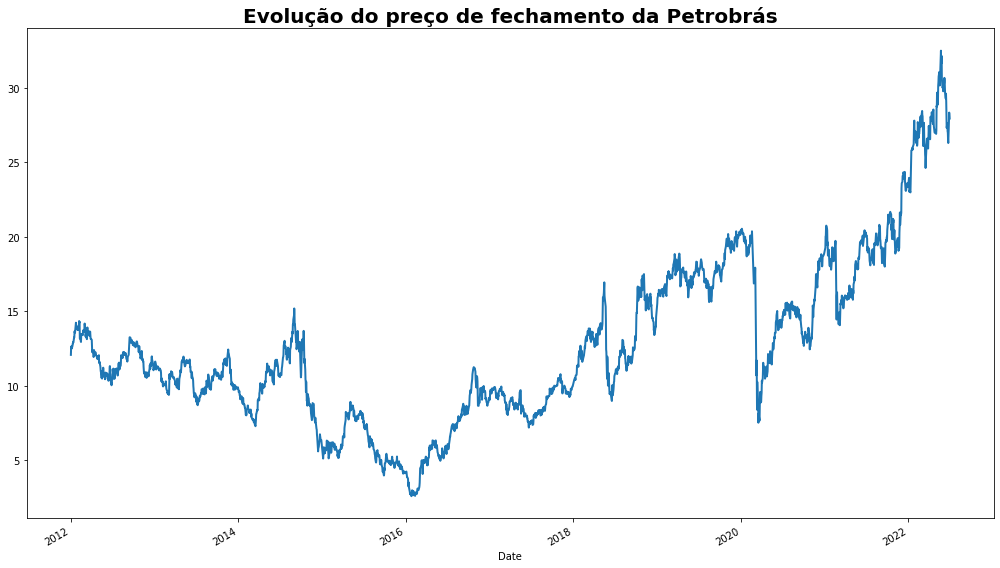

In [37]:
fig, ax = plt.subplots(figsize=(14, 8))
petro['Close'].plot(kind='line', ax=ax, linewidth=2)
ax.set_title('Evolução do preço de fechamento da Petrobrás', fontsize=20, fontweight='bold')
plt.tight_layout()

### Definir variável-alvo

In [38]:
petro['tomorrow'] = petro['Close'].shift(-1)

In [39]:
petro['target'] = (petro['tomorrow'] > petro['Close']).astype(int)

### Conjunto de treino e teste

In [40]:
# conjunto de treinamento e de teste
train = petro.iloc[:-200]
test = petro.iloc[-200:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']

### Construir e treinar o modelo

In [63]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 500, max_depth=100, random_state=1)

In [64]:
model.fit(train[predictors], train['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [65]:
ypred = model.predict(test[predictors])
ypred = pd.Series(ypred, index=test.index)

In [66]:
from sklearn.metrics import precision_score
precision_score(test['target'], ypred ) * 100

52.94117647058824